In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
kahovka_cells = pd.read_csv("C:/Users/mkrooted/Uni/diploma/data/kahovka.txt", header=None, names=['cell_id'])
kahovka_cells = kahovka_cells.cell_id
kahovka_cells

0       175
1       176
2       177
3       178
4       179
       ... 
446    3133
447    3134
448    3164
449    3165
450    3196
Name: cell_id, Length: 451, dtype: int64

In [41]:
kahovka_cells_set = set(kahovka_cells)

In [92]:
cells_area = pd.read_csv("C:/Users/mkrooted/Uni/diploma/data/coords-area.txt", sep="\s+").drop(columns=['Cell', 'Longitude', 'Latitude'])
cells_area

,Area
0,1000000.0
1,1000000.0
2,1000000.0
3,1000000.0
4,1000000.0
...,...
8051,256000000.0
8052,256000000.0
8053,256000000.0
8054,256000000.0


---

In [3]:
data_dir_1 = "C:\\Users\\mkrooted\\Uni\\diploma\\data\\results\\TDepCs137"
data_dir_2 = "C:\\Users\\mkrooted\\Uni\\diploma\\data\\results2\\TDepCs137"

In [47]:
import datetime, os

def filename2datetime(fname: str):
    if '.' in fname:
        datestr = fname.split('.')[1]
    else: 
        datestr = fname
    y = int(datestr[0:4])
    m = int(datestr[4:6])
    d = int(datestr[6:8])
    hour = int(datestr[8:10])
    minute = int(datestr[10:12])
    return datetime.datetime(y, m, d, hour, minute)

def get_data_paths():
    files1 = os.listdir(data_dir_1)
    files2 = os.listdir(data_dir_2)
    times = [ filename2datetime(f) for f in (files1 + files2) ]
    data = [ pd.read_csv(f'{data_dir_1}\\{f}', header=None, sep='\s+') for f in files1 ]
    data = [ np.array(d[d.columns[-1]]) for d in data ]
    data1 = [ pd.read_csv(f'{data_dir_2}\\{f}', header=None, sep='\s+') for f in files2 ]
    data += [ np.array(d[d.columns[-1]]) for d in data1 ]

    return pd.DataFrame({'start_time': times, 'final_values': data})

In [39]:
sample_data_path = "C:\\Users\\mkrooted\\Uni\\diploma\\data\\results\\TDepCs137\\5cc329f7-ac13-b001-6f0c-a69253da3460.202207011914"

In [48]:
df = get_data_paths()

In [50]:
df.final_values[0].shape

(8056,)

---

In [51]:
TOTAL_CELL_NUMBER = 8056

In [97]:
def calculate_kahovka_deposit(cell_values):
    sum = 0
    for i in range(TOTAL_CELL_NUMBER):
        if i in kahovka_cells_set:
            sum += cell_values[i] * cells_area.Area[i]
    return sum

In [107]:
kahovka_deposits = df.copy()
kahovka_deposits.final_values = kahovka_deposits.final_values.apply(calculate_kahovka_deposit)
kahovka_deposits['log_final_values'] = np.log10(kahovka_deposits.final_values)

c:\Users\mkrooted\.conda\envs\sci\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [108]:
kahovka_deposits

,start_time,final_values,log_final_values
0,2022-07-01 19:14:00,3.601087e+07,7.556434
1,2022-07-01 22:55:00,4.509690e+07,7.654147
2,2022-07-03 10:43:00,1.389949e+11,11.142999
3,2022-07-04 04:58:00,5.272397e+10,10.722008
4,2022-07-05 02:58:00,5.826374e+10,10.765398
...,...,...,...
215,2023-02-04 14:00:00,2.697720e+11,11.430997
216,2023-02-05 21:08:00,0.000000e+00,-inf
217,2023-02-06 19:09:00,0.000000e+00,-inf
218,2023-02-07 18:08:00,0.000000e+00,-inf


In [109]:
kah_dep_vals = kahovka_deposits.final_values
log_kah_dep_vals = kahovka_deposits.log_final_values
kah_dep_vals.describe()

count    2.200000e+02
mean     2.231020e+12
std      3.539279e+12
min      0.000000e+00
25%      3.160910e+11
50%      9.526012e+11
75%      2.652061e+12
max      2.505495e+13
Name: final_values, dtype: float64

Text(0.5, 1.0, 'log Bq kahovka histogram.')

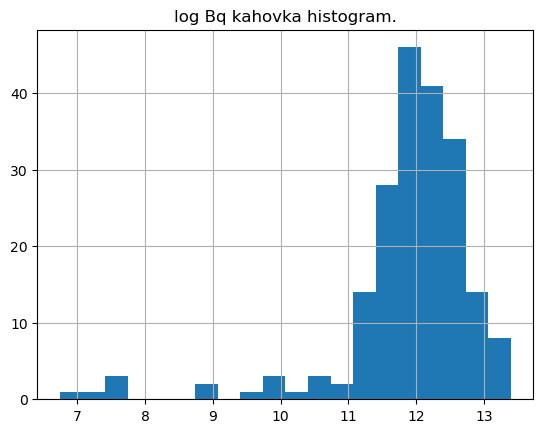

In [111]:
log_kah_dep_vals = log_kah_dep_vals[~np.isinf(log_kah_dep_vals)]
log_kah_dep_vals.hist(bins=20)
plt.title('log Bq kahovka histogram.')

In [112]:
kahovka_deposits.to_csv('kahovka_deposits_v1.csv')